In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import StringIO
from scipy.optimize import curve_fit
from typing import Tuple

In [2]:
def download_data():
    url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
    PROXY = dict(http="http://localhost:8080", https="http://localhost:8080")
    url_req = requests.get(url, proxies=PROXY)
    covid_timeseries = pd.read_csv(StringIO(url_req.text))
    return covid_timeseries.rename(columns={"Province/State": "province_state",
                                            "Country/Region": "country_region",
                                            "Lat": "lat",
                                            "Long": "long"})

In [11]:
def get_country_data(covid_df: pd.DataFrame, country: str) -> pd.DataFrame:
    return (
        covid_df
        .query('country_region == @country')
        .drop(columns="province_state")
        .melt(id_vars=['country_region', 'lat', 'long'],
              var_name="date",
              value_name="cases")
    )

In [5]:
def exp_fit(x, a, b, c):
    return a * np.exp(b * x) + c

In [8]:
def calc_country_fit(country: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    country_gt0 = country.query('cases > 0')
    x = country_gt0['cases'].reset_index().index.values
    y = country_gt0['cases'].values

    country_vars, country_cov = curve_fit(exp_fit, x, y)
    return x, y, country_vars, country_cov

In [19]:
def plot_fit(country: pd.DataFrame):
    cases_gt0 = country.query('cases > 0')
    country_name = cases_gt0.reset_index()['country_region'].iloc[0]
    x, y, country_vars, country_cov = calc_country_fit(country)
    doubling_time = np.log(2) / country_vars[1]
    doubling_text = r'$t_{1/2 \ \mathrm{(exp. fit)}} = %.2f \ \mathrm{days}$' % doubling_time
    max_y = np.amax(y) // 10
    plt.figure()
    plt.plot(cases_gt0['date'].values, cases_gt0['cases'].values, 'b.')
    plt.plot(cases_gt0['date'], exp_fit(x, *country_vars), 'r-', label='Exp. fit')
    plt.title(f'COVID-19 cases in {country_name}')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.text(0, max_y * 9, doubling_text, {'color': 'r', 'fontsize': 16})
    plt.show()

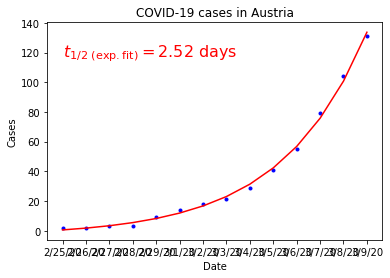

In [20]:
raw_df = download_data()
country_data = get_country_data(raw_df, "Austria")
plot_fit(country_data)

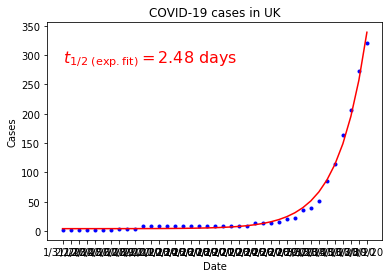

In [21]:
raw_df = download_data()
country_data = get_country_data(raw_df, "UK")
plot_fit(country_data)

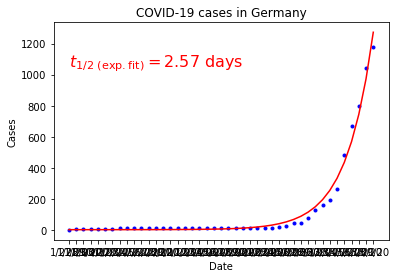

In [22]:
raw_df = download_data()
country_data = get_country_data(raw_df, "Germany")
plot_fit(country_data)

In [4]:
covid_timeseries.query('country_region == "Austria"').drop(columns="province_state")

,country_region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20
88,Austria,47.5162,14.5501,0,0,0,0,0,0,0,...,3,9,14,18,21,29,41,55,79,104


In [5]:
covid_long = covid_timeseries.query('country_region == "Austria"').drop(columns="province_state").melt(id_vars=["country_region", "Lat", "Long"])

Text(0, 0.5, 'Cases')

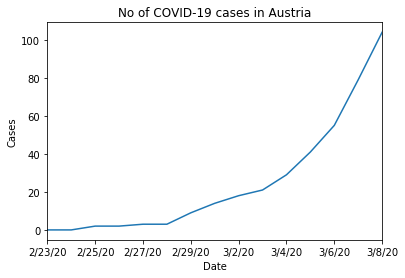

In [6]:
ax = covid_long.tail(n=15).plot(x="variable", y="value", legend=None, title="No of COVID-19 cases in Austria")
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

In [7]:
covid_long.tail(n=15)

,country_region,Lat,Long,variable,value
32,Austria,47.5162,14.5501,2/23/20,0
33,Austria,47.5162,14.5501,2/24/20,0
34,Austria,47.5162,14.5501,2/25/20,2
35,Austria,47.5162,14.5501,2/26/20,2
36,Austria,47.5162,14.5501,2/27/20,3
37,Austria,47.5162,14.5501,2/28/20,3
38,Austria,47.5162,14.5501,2/29/20,9
39,Austria,47.5162,14.5501,3/1/20,14
40,Austria,47.5162,14.5501,3/2/20,18
41,Austria,47.5162,14.5501,3/3/20,21


In [17]:
covid_long.query('value > 0').reset_index()['country_region'].iloc[0]

'Austria'

In [12]:
covid_at = (
    covid_timeseries.query('country_region == "Austria"')
    .drop(columns="province_state")
    .melt(id_vars=["country_region", "Lat", "Long"],
          var_name = "date",
          value_name = "cases")
)

covid_at_gt0 = covid_at.query('cases > 0')

x = covid_at_gt0['cases'].reset_index().index.values
y = covid_at_gt0['cases'].values

at_vars, at_cov = curve_fit(func, x, y)

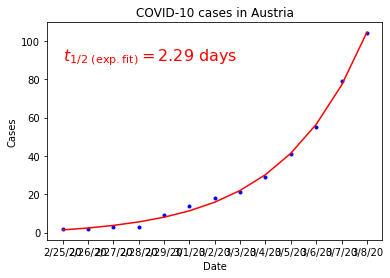

In [13]:
plt.figure()
plt.plot(covid_at_gt0['date'].values, covid_at_gt0['cases'].values, 'b.')
plt.plot(covid_at_gt0['date'], func(x, *at_vars), 'r-', label='Exp. fit')
plt.title("COVID-10 cases in Austria")
plt.xlabel("Date")
plt.ylabel("Cases")
doubling_time = np.log(2) / at_vars[1]
text = r'$t_{1/2 \ \mathrm{(exp. fit)}} = %.2f \ \mathrm{days}$' % doubling_time
plt.text(0, 90, text, {'color': 'r', 'fontsize': 16})
plt.show()

In [14]:
covid_uk = (
    covid_timeseries.query('country_region == "UK"')
    .drop(columns="province_state")
    .melt(id_vars=["country_region", "Lat", "Long"],
          var_name = "date",
          value_name = "cases")
)

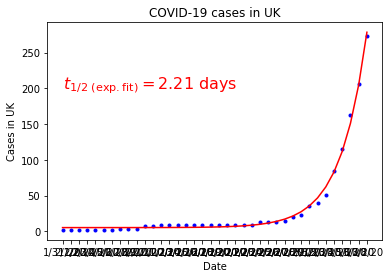

In [15]:
covid_uk_gt0 = covid_uk.query('cases > 0')

uk_x = covid_uk_gt0['cases'].reset_index().index.values
uk_y = covid_uk_gt0['cases'].values

uk_vars, uk_cov = curve_fit(func, uk_x, uk_y)

plt.figure()
plt.plot(covid_uk_gt0['date'].values, covid_uk_gt0['cases'].values, 'b.')
plt.plot(covid_uk_gt0['date'].values, func(uk_x, *uk_vars), 'r-')
plt.title("COVID-19 cases in UK")
plt.xlabel("Date")
plt.ylabel("Cases in UK")
doubling_time = np.log(2) / uk_vars[1]
text = r'$t_{1/2 \ \mathrm{(exp. fit)}} = %.2f \ \mathrm{days}$' % doubling_time
plt.text(0, 200, text, {'color': 'r', 'fontsize': 16})
plt.show()